# Testing the model using images which are not present either in Testing or Training data

In [1]:
import os
import numpy as np
import pickle
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.models        import load_model
from tensorflow.keras.preprocessing import image


1/1 [==============================] - 0s 346ms/step


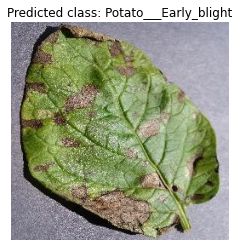

1/1 [==============================] - 0s 56ms/step


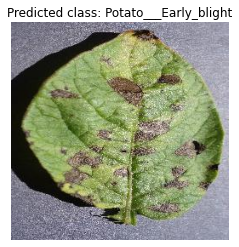

1/1 [==============================] - 0s 59ms/step


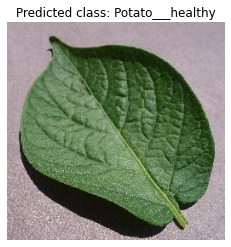

1/1 [==============================] - 0s 52ms/step


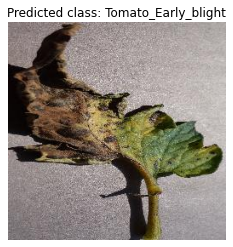

1/1 [==============================] - 0s 51ms/step


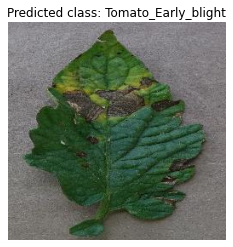

1/1 [==============================] - 0s 51ms/step


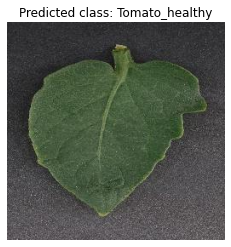

1/1 [==============================] - 0s 52ms/step


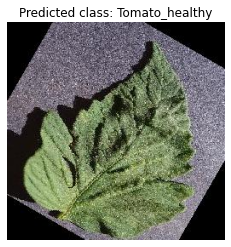

In [2]:
# Load the saved label_transform.pkl file
with open('label_transform.pkl', 'rb') as f:
    label_binarizer = pickle.load(f)

# Load the saved model
model = load_model('my_model.h5')

# Define the class labels
class_labels = label_binarizer.classes_

# Define the function to preprocess the input image
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))
    image = image.astype("float") / 255.0
    image = np.expand_dims(image, axis=0)
    return image

# Set the path to the test images directory
test_dir = r"C:\Users\Hp\OneDrive\Desktop\reddybr\epochs 30, 500 images\testimages"

# Loop over the images in the test directory
for filename in os.listdir(test_dir):
    # Load and preprocess the input image
    image_path = os.path.join(test_dir, filename)
    img = preprocess_image(image_path)

    # Use the loaded model to predict the class of the input image
    preds = model.predict(img)

    # Convert the predictions to class labels
    pred_labels = label_binarizer.inverse_transform(preds)[0]

    # Display the input image and the predicted class label
    img = cv2.imread(image_path)
    img = cv2.resize(img, (256, 256))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted class: {pred_labels}")
    plt.axis('off')
    plt.show()
